In [55]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import string
import nltk # Imports the library
import string
import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix

In [2]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [3]:
df = pd.read_csv('sample2.csv')

In [4]:
df.head()

,Unnamed: 0,domain,type,content,title,authors,sentiment,magnitude
0,0,wikileaks.com,unreliable,Tor\n\nTor is an encrypted anonymising network...,"Pages that link to ""CRS: The Iraq Marshes: Res...",NaN,0.0,1.7
1,1,www.yahoo.com,reliable,NEW YORK (AP) — Ringling Bros. and Barnum & Ba...,New show 'Circus 1903' brings back live elepha...,MARK KENNEDY,0.2,8.2
2,2,www.huffingtonpost.com,reliable,The Importance Of Being Kind 11/15/2016 09:44 ...,The Importance Of Being Kind,Maria Rodale,0.1,18.0
3,3,thedailysheeple.com,conspiracy,Delivered by The Daily Sheeple\n\nWe encourage...,japan-nuclear-radiation,Meat Grinder Media,0.1,0.8
4,4,beforeitsnews.com,fake,What Most Good Investors Do\n\n% of readers th...,What Most Good Investors Do,Jim Rogers Blog,0.0,2.4


In [5]:
df.head()

,Unnamed: 0,domain,type,content,title,authors,sentiment,magnitude
0,0,wikileaks.com,unreliable,Tor\n\nTor is an encrypted anonymising network...,"Pages that link to ""CRS: The Iraq Marshes: Res...",NaN,0.0,1.7
1,1,www.yahoo.com,reliable,NEW YORK (AP) — Ringling Bros. and Barnum & Ba...,New show 'Circus 1903' brings back live elepha...,MARK KENNEDY,0.2,8.2
2,2,www.huffingtonpost.com,reliable,The Importance Of Being Kind 11/15/2016 09:44 ...,The Importance Of Being Kind,Maria Rodale,0.1,18.0
3,3,thedailysheeple.com,conspiracy,Delivered by The Daily Sheeple\n\nWe encourage...,japan-nuclear-radiation,Meat Grinder Media,0.1,0.8
4,4,beforeitsnews.com,fake,What Most Good Investors Do\n\n% of readers th...,What Most Good Investors Do,Jim Rogers Blog,0.0,2.4


In [6]:
df.drop(['Unnamed: 0','title', 'authors'],axis = 1, inplace = True)

In [7]:
df.head()

,domain,type,content,sentiment,magnitude
0,wikileaks.com,unreliable,Tor\n\nTor is an encrypted anonymising network...,0.0,1.7
1,www.yahoo.com,reliable,NEW YORK (AP) — Ringling Bros. and Barnum & Ba...,0.2,8.2
2,www.huffingtonpost.com,reliable,The Importance Of Being Kind 11/15/2016 09:44 ...,0.1,18.0
3,thedailysheeple.com,conspiracy,Delivered by The Daily Sheeple\n\nWe encourage...,0.1,0.8
4,beforeitsnews.com,fake,What Most Good Investors Do\n\n% of readers th...,0.0,2.4


In [8]:
df = df[(df['sentiment']!=0) | (df['magnitude']!=0)]
df

,domain,type,content,sentiment,magnitude
0,wikileaks.com,unreliable,Tor\n\nTor is an encrypted anonymising network...,0.0,1.7
1,www.yahoo.com,reliable,NEW YORK (AP) — Ringling Bros. and Barnum & Ba...,0.2,8.2
2,www.huffingtonpost.com,reliable,The Importance Of Being Kind 11/15/2016 09:44 ...,0.1,18.0
3,thedailysheeple.com,conspiracy,Delivered by The Daily Sheeple\n\nWe encourage...,0.1,0.8
4,beforeitsnews.com,fake,What Most Good Investors Do\n\n% of readers th...,0.0,2.4
...,...,...,...,...,...
154657,nytimes.com,reliable,"This year’s winner, Karl Meltzer, 41, of Sandy...",0.0,13.0
154997,nytimes.com,reliable,The narrator of Giles Foden’s new novel is a r...,0.0,12.0
160334,beforeitsnews.com,fake,"Happy 80th Birthday, Warren Buffett… Will You ...",0.0,2.0
175394,threepercenternation.com,fake,In The News\n\nTurkey Catches ISIS Istanbul Gu...,0.0,1.0


In [9]:
df['type'] = df['type'].map({'fake': 0, 'reliable': 1, 'unreliable': 0, 'conspiracy':0})

In [45]:
sample = df.sample(frac = 1)

In [20]:
sample, test_sample = train_test_split(df, test_size=0.2, random_state=42)

In [46]:
sample.groupby('type').size()

type
0    24168
1    22613
dtype: int64

In [176]:
sample[['sentiment','magnitude','type']]

,sentiment,magnitude,type
16384,-0.3,31.799999,0
44257,0.0,35.700001,0
17784,-0.1,0.400000,0
5238,0.1,5.300000,0
21808,0.1,0.100000,0
...,...,...,...
11402,-0.1,8.900000,1
45179,0.4,8.800000,0
38531,0.0,16.000000,0
869,0.1,1.700000,0


In [177]:
sample[['sentiment','magnitude','type']].describe()

,sentiment,magnitude,type
count,37424.000000,37424.000000,37424.000000
mean,0.003268,7.866252,0.486773
std,0.174753,11.848041,0.499832
min,-0.900000,0.100000,0.000000
25%,-0.100000,1.700000,0.000000
50%,0.000000,4.400000,0.000000
75%,0.100000,10.600000,1.000000
max,0.900000,417.299988,1.000000


In [36]:
sample['sentiment'][sample['type'] ==0]

8519     0.0
33148   -0.1
32707   -0.2
38390   -0.3
35076    0.0
        ... 
22129    0.6
46509    0.5
18056    0.1
30491   -0.2
39313    0.0
Name: sentiment, Length: 24168, dtype: float64

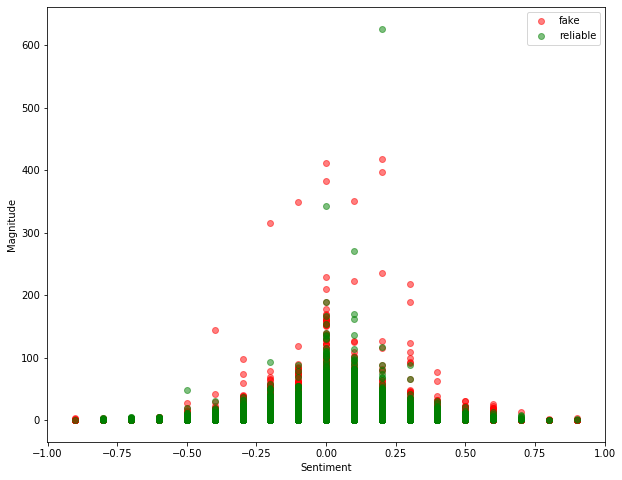

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(sample['sentiment'][sample['type']==0], sample['magnitude'][sample['type']==0], alpha=0.5, label = 'fake', c ='red')
plt.scatter(sample['sentiment'][sample['type']==1], sample['magnitude'][sample['type']==1], alpha=0.5, label = 'reliable', c='green')
plt.legend()
plt.xlabel('Sentiment')
plt.ylabel('Magnitude')
plt.show()

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
transformer = CountVectorizer(analyzer=text_process).fit(sample['content'])

# Print total number of vocab words
print(len(transformer.vocabulary_))

405730


In [182]:
content_bow = transformer.transform(sample['content'])

In [183]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(content_bow)
content_tfidf = tfidf_transformer.transform(content_bow)
print(content_tfidf.shape)

(37424, 405730)


In [185]:
content_tfidf

<37424x405730 sparse matrix of type '<class 'numpy.float64'>'
	with 7109941 stored elements in Compressed Sparse Row format>

In [186]:
from sklearn.naive_bayes import MultinomialNB
fake_detect_model = MultinomialNB().fit(content_tfidf, sample['type'])

In [53]:
test_sample = df.sample(frac = 0.2, random_state = 42)

In [187]:
test_transformer = CountVectorizer(analyzer=text_process).fit(test_sample['content'])
content_test_bow = transformer.transform(test_sample['content'])
tfidf__test_transformer = TfidfTransformer().fit(content_test_bow)
content_test_tfidf = tfidf_transformer.transform(content_test_bow)

In [188]:
test = fake_detect_model.predict(content_test_tfidf)

In [189]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(test,test_sample['type']))
print(confusion_matrix(test_sample['type'], test))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4122
           1       0.98      0.82      0.89      5235

    accuracy                           0.89      9357
   macro avg       0.89      0.90      0.89      9357
weighted avg       0.90      0.89      0.89      9357

[[4025  936]
 [  97 4299]]


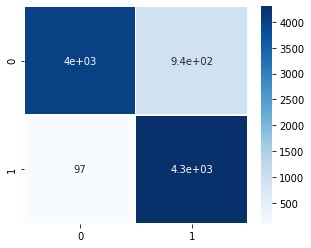

In [66]:
df_cm = pd.DataFrame([[4025,936],[97,4299]])
plt.figure(figsize = (5,4))
plt.xlabel('Predicted label')
plt.ylabel('True label')
sb.heatmap(df_cm, annot=True, cmap="Blues",linewidths=0.25)
plt.show()

### Create a new spare matrix features where add sentiment and magnitude arrays (NORMALIZED)

In [190]:
sentiment = sample[['sentiment']]
magnitude = sample[['magnitude']]

In [191]:
sentiment.describe()

,sentiment
count,37424.000000
mean,0.003268
std,0.174753
min,-0.900000
25%,-0.100000
50%,0.000000
75%,0.100000
max,0.900000


In [192]:
magnitude.describe()

,magnitude
count,37424.000000
mean,7.866252
std,11.848041
min,0.100000
25%,1.700000
50%,4.400000
75%,10.600000
max,417.299988


#### Normalize sentiment and magnitude values

In [193]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

def normalize(data):    
    data_scaled = min_max_scaler.fit_transform(data.values)
    return pd.DataFrame(data_scaled)

sentiment_normalized = normalize(sentiment)
magnitude_normalized = normalize(magnitude)

In [194]:
new_features = hstack((content_tfidf, np.array(sentiment_normalized[0])[:,None]))
new_features = hstack((new_features, np.array(magnitude_normalized[0])[:,None]))

In [195]:
new_features

<37424x405732 sparse matrix of type '<class 'numpy.float64'>'
	with 7184158 stored elements in COOrdinate format>

In [196]:
fake_detect_model_sentiment_API = MultinomialNB().fit(new_features, sample['type'])

In [197]:
content_test_tfidf

<9357x405730 sparse matrix of type '<class 'numpy.float64'>'
	with 1712568 stored elements in Compressed Sparse Row format>

In [198]:
sentiment_test = normalize(test_sample[['sentiment']])
magnitude_test = normalize(test_sample[['magnitude']])

In [199]:
new_features_test = hstack((content_test_tfidf, np.array(sentiment_test[0])[:,None]))
new_features_test = hstack((new_features_test, np.array(magnitude_test[0])[:,None]))

In [200]:
pred = fake_detect_model_sentiment_API.predict(new_features_test)

In [201]:
print(classification_report(pred, test_sample['type']))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4155
           1       0.98      0.83      0.90      5202

    accuracy                           0.89      9357
   macro avg       0.90      0.90      0.89      9357
weighted avg       0.91      0.89      0.89      9357



[[4057  904]
 [  98 4298]]


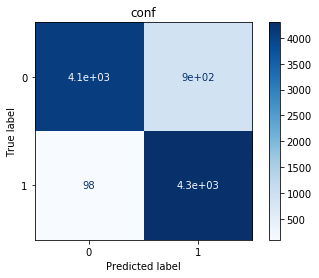

In [202]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(fake_detect_model_sentiment_API, new_features_test, test_sample['type'], normalize = None,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("conf")
print(confusion_matrix(test_sample['type'], pred))

### Create a new spare matrix features where add sentiment and magnitude arrays

In [203]:
sample[['sentiment']].describe()

,sentiment
count,37424.000000
mean,0.003268
std,0.174753
min,-0.900000
25%,-0.100000
50%,0.000000
75%,0.100000
max,0.900000


In [204]:
sentiment_u = sample[['sentiment']] + 0.9
magnitude_u = sample[['magnitude']]

In [205]:
new_features = hstack((content_tfidf, np.array(sentiment_u['sentiment'])[:,None]))
new_features = hstack((new_features, np.array(magnitude_u['magnitude'])[:,None]))

In [206]:
new_features

<37424x405732 sparse matrix of type '<class 'numpy.float64'>'
	with 7184789 stored elements in COOrdinate format>

In [207]:
fake_detect_model_sentiment_API_u = MultinomialNB().fit(new_features, sample['type'])

In [208]:
sentiment_test_u = test_sample[['sentiment']] + 0.9
magnitude_test_u = test_sample[['magnitude']]

In [209]:
new_features_test = hstack((content_test_tfidf, np.array(sentiment_test_u['sentiment'])[:,None]))
new_features_test = hstack((new_features_test, np.array(magnitude_test_u['magnitude'])[:,None]))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4135
           1       0.98      0.82      0.89      5222

    accuracy                           0.89      9357
   macro avg       0.90      0.90      0.89      9357
weighted avg       0.90      0.89      0.89      9357

[[4035  926]
 [ 100 4296]]


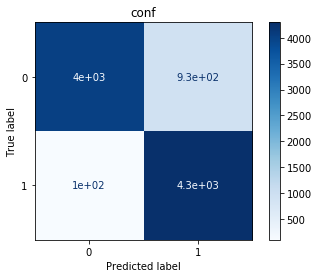

In [210]:
pred = fake_detect_model_sentiment_API_u.predict(new_features_test)

print(classification_report(pred, test_sample['type']))

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(fake_detect_model_sentiment_API, new_features_test, test_sample['type'], normalize = None,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("conf")
print(confusion_matrix(test_sample['type'], pred))